In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import poisson
from scipy.optimize import curve_fit

from load_data import *

In [2]:
file = './data/Digitizer Efficiency Overnight.txt'
data = load_digitizer(file)
describe(data)

Number of events: 1943573
Δt_us: min=1.0000, max=40.1200, mean=20.6508
Amp1: min=0.0329, max=0.6668
Amp2: min=-0.0045, max=0.2751
Width1: min=5.3689e-08, max=5.6980e-07
Width2: min=0.0000e+00, max=2.4959e-07


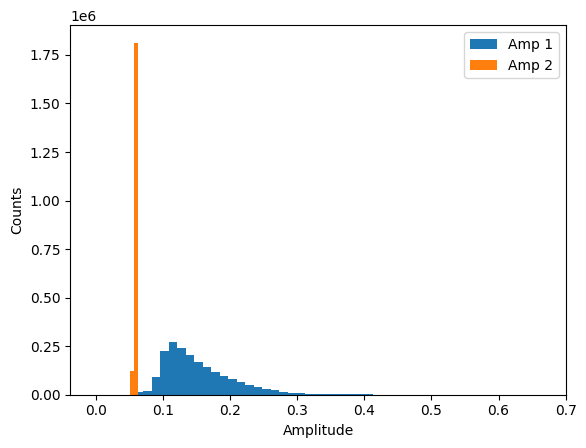

In [3]:
lifetime = data["t2"] - data["t1"]
plt.hist(data["A1"], bins=50, label="Amp 1")
plt.hist(data["A2"], bins=50, label="Amp 2")
plt.xlabel("Amplitude"); plt.ylabel("Counts")
plt.legend()
plt.show()

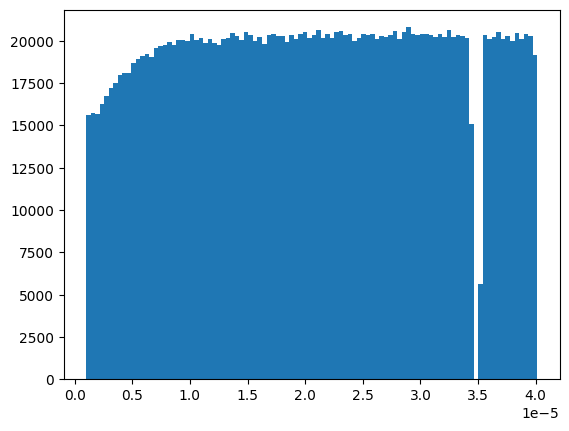

In [7]:
plt.hist(lifetime, bins=100)
plt.show()

In [4]:
lifetime = data["Ch0_time2 (s)"] - data["Ch0_time1 (s)"]

hist, bin_edges = np.histogram(lifetime, bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
hist = hist[0:]
bin_centers = bin_centers[0:]

def exp_decay(t, A, tau, C):
    return A * np.exp(-t / tau) + C

p0 = [np.max(hist), np.mean(lifetime), 0]
params, cov = curve_fit(exp_decay, bin_centers, hist, p0=p0)
A_fit, tau_fit, C_fit = params

A_err, tau_err, C_err = np.sqrt(np.diag(cov))
print(f"Fitted mean lifetime tau = {tau_fit:.3e} ± {tau_err:.3e} s")

Fitted mean lifetime tau = 4.878e-07 ± 1.242e-08 s


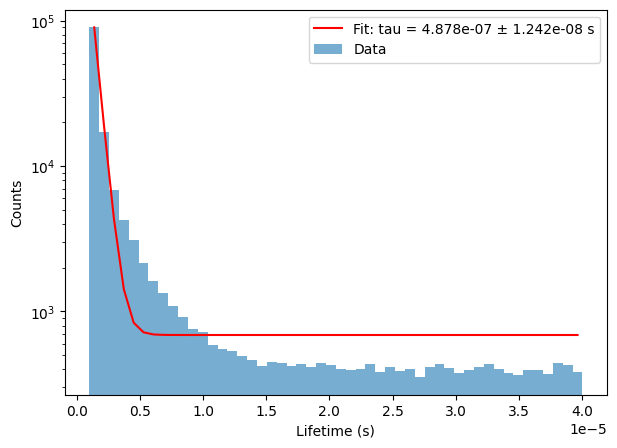

In [5]:
plt.figure(figsize=(7,5))
plt.bar(bin_centers, hist, width=(bin_edges[1]-bin_edges[0]), alpha=0.6, label='Data')
plt.plot(bin_centers, exp_decay(bin_centers, A_fit, tau_fit, C_fit), 'r-', label=f'Fit: tau = {tau_fit:.3e} ± {tau_err:.3e} s')
plt.yscale("log")
plt.xlabel("Lifetime (s)")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [ ]:
#| echo: false
#| output: false
filename = "eda.ipynb"

!html2pdf "$filename"